## Path home problem

In [ ]:
import numpy as np
import random

# Define the grid size
GRID_SIZE = 3
START_STATE = (0, 0)
HOME_STATE = (2, 2)

# Define actions
ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT']

# Define learning parameters
ALPHA = 0.1  # Learning rate
GAMMA = 0.9  # Discount factor
EPSILON = 0.1  # Epsilon for epsilon-greedy policy

# Initialize the value function (all zeros)
V = np.zeros((GRID_SIZE, GRID_SIZE))

# Function to calculate the Euclidean distance
def euclidean_distance(state1, state2):
    return np.sqrt((state1[0] - state2[0]) ** 2 + (state1[1] - state2[1]) ** 2)

# Function to get reward for a given state
def get_reward(state):
    return -euclidean_distance(state, HOME_STATE)

# Function to take an action and return the next state
def take_action(state, action):
    x, y = state
    if action == 'UP' and x > 0:
        return (x - 1, y)
    elif action == 'DOWN' and x < GRID_SIZE - 1:
        return (x + 1, y)
    elif action == 'LEFT' and y > 0:
        return (x, y - 1)
    elif action == 'RIGHT' and y < GRID_SIZE - 1:
        return (x, y + 1)
    else:
        return state  # No change if action is not valid

# Epsilon-greedy policy
def epsilon_greedy_policy(state):
    if random.uniform(0, 1) < EPSILON:
        return random.choice(ACTIONS)  # Explore: random action
    else:
        # Exploit: choose the action with the highest value
        values = [V[take_action(state, action)] for action in ACTIONS]
        return ACTIONS[np.argmax(values)]

# Temporal Difference Learning (TD(0))
def td_learning(episodes=1000):
    for episode in range(episodes):
        state = START_STATE  # Start at the initial state

        while state != HOME_STATE:
            # Choose an action using the epsilon-greedy policy
            action = epsilon_greedy_policy(state)
            next_state = take_action(state, action)
            reward = get_reward(next_state)

            # Update the value function using TD(0) formula
            V[state] += ALPHA * (reward + GAMMA * V[next_state] - V[state])

            # Move to the next state
            state = next_state

        # Print value function for debugging
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}, Value Function:\n", V)

# Run TD Learning
td_learning(episodes=1000)

# Display final value function
print("Final Value Function:\n", V)


Episode 100, Value Function:
 [[-4.8210699  -3.1434397  -1.30489511]
 [-2.66502281 -1.16666579 -0.03697393]
 [-1.51379905 -0.30895019  0.        ]]
Episode 200, Value Function:
 [[-4.78922616 -2.64709707 -1.59854917]
 [-2.92925455 -1.23152214 -0.0935814 ]
 [-1.93959878 -0.44782257  0.        ]]
Episode 300, Value Function:
 [[-5.13891124 -3.5125993  -1.93610962]
 [-3.21317813 -1.47143095 -0.19243313]
 [-1.89318552 -0.97975606  0.        ]]
Episode 400, Value Function:
 [[-5.41581425 -3.5260864  -1.93610962]
 [-3.24098488 -1.20403426 -0.07712021]
 [-1.87426473 -0.64281795  0.        ]]
Episode 500, Value Function:
 [[-5.22539742 -3.75113761 -1.61004319]
 [-3.41653795 -2.22513371 -0.34393807]
 [-1.44172967 -0.45969065  0.        ]]
Episode 600, Value Function:
 [[-5.3910499  -3.2961086  -1.36465995]
 [-3.8339321  -1.94980528 -0.03563466]
 [-1.55052203 -0.66799678  0.        ]]
Episode 700, Value Function:
 [[-5.25158456 -3.26229377 -1.34924796]
 [-3.9715231  -1.77266106 -0.27507386]
 [-1

In [ ]:
# Function to get the optimal policy based on the value function
def get_policy():
    policy = np.full((GRID_SIZE, GRID_SIZE), '', dtype=object)  # Initialize empty policy grid

    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            state = (x, y)

            if state == HOME_STATE:
                policy[x, y] = 'HOME'  # At the goal, no action needed
            else:
                # Evaluate the value of each action from the current state
                values = [V[take_action(state, action)] for action in ACTIONS]

                # Choose the action with the highest value
                best_action = ACTIONS[np.argmax(values)]
                policy[x, y] = best_action

    return policy

# Get the policy
optimal_policy = get_policy()

# Display the policy
print("Optimal Policy (Directions):")
for row in optimal_policy:
    print(row)


Optimal Policy (Directions):
['RIGHT' 'DOWN' 'DOWN']
['RIGHT' 'RIGHT' 'DOWN']
['RIGHT' 'RIGHT' 'HOME']


# Random walk problem
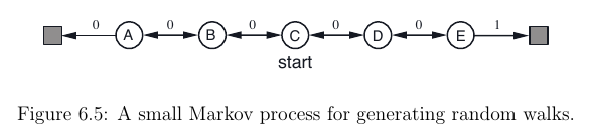


In [ ]:
import numpy as np

# Define parameters
alpha = 0.1  # Learning rate
gamma = 1.0  # Discount factor
episodes = 1000  # Number of episodes
num_states = 7  # Number of states (L,A, B, C, D, E,R)

# Initialize the state-value function for states
V = np.zeros(num_states)

# Starting state is always C (index 2)
start_state = 2
terminal_left = 0
terminal_right = num_states - 1

# Define transitions (left and right)
def transition(state):
    if state == terminal_left or state == terminal_right:
        return state, 0  # Terminal state
    next_state = state + np.random.choice([-1, 1])  # Move left or right
    reward = 0
    if next_state == terminal_right:
        reward = 1  # Reward of 1 for reaching the right terminal state
    return next_state, reward

# Temporal Difference Learning (TD(0))
for episode in range(episodes):
    state = start_state
    while state != terminal_left and state != terminal_right:
        next_state, reward = transition(state)
        # TD update rule
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        state = next_state

# Print the learned state values
print("Learned State-Value Function:")
for i, v in enumerate(V):
    print(f"State {chr(65+i)}: {v:.2f}")


Learned State-Value Function:
State A: 0.00
State B: 0.14
State C: 0.38
State D: 0.53
State E: 0.70
State F: 0.85
State G: 0.00


In [ ]:
# Find the optimal path directions based on the learned state values
def find_optimal_path(V):
    optimal_policy = []
    for state in range(1, num_states - 1):  # Exclude terminal states
        left_value = V[state - 1]
        right_value = V[state + 1]

        if right_value > left_value:
            optimal_policy.append('right')
        else:
            optimal_policy.append('left')

    return optimal_policy

# Call the function and print the optimal path directions
optimal_policy = find_optimal_path(V)
for i, direction in enumerate(optimal_policy):
    print(f"Optimal move from State {chr(65 + i )}: {direction}")


Optimal move from State A: right
Optimal move from State B: right
Optimal move from State C: right
Optimal move from State D: right
Optimal move from State E: left


Here we can see that for state E it mentions left, because it takes into account only the states and not the action sequences. In order to fix it, we need to take into account the actions also.

In [ ]:
# Define actions
LEFT = -1
RIGHT = 1

# Find the optimal path directions considering actions
def find_optimal_path_with_actions(V):
    optimal_policy = []

    for state in range(num_states):
        if state == terminal_left:
            optimal_policy.append('terminal')  # Terminal state, no action
        elif state == terminal_right:
            optimal_policy.append('terminal')  # Terminal state, no action
        else:
            left_value = V[state + LEFT]
            right_value = V[state + RIGHT]

            if state + RIGHT == terminal_right:  # Consider terminal right reward
                right_value += 1  # Reward for reaching terminal state

            if right_value > left_value:
                optimal_policy.append('right')
            else:
                optimal_policy.append('left')

    return optimal_policy

# Call the function and print the optimal path directions with actions considered
optimal_policy = find_optimal_path_with_actions(V)
for i, direction in enumerate(optimal_policy):
    if direction != 'terminal':
        print(f"Optimal move from State {chr(65 + i)}: {direction}")
    else:
        print(f"State {chr(65 + i)} is a terminal state")


State A is a terminal state
Optimal move from State B: right
Optimal move from State C: right
Optimal move from State D: right
Optimal move from State E: right
Optimal move from State F: right
State G is a terminal state


Above is a hardcoded approach. If we want to generalize it, then we need to add rewards to V values while calculating the optimal policy.  For this, the rewards(state1,state2) function is needed.

Let's now plot the graph for error vs no of eps

In [13]:
import numpy as np

# Define parameters
alpha = 0.1  # Learning rate
gamma = 1.0  # Discount factor
episodes = 1000  # Number of episodes
num_states = 7  # Number of states (L,A, B, C, D, E,R)

# Initialize the state-value function for states
V = np.zeros(num_states)

# Starting state is always C (index 2)
start_state = 2
terminal_left = 0
terminal_right = num_states - 1

# Define transitions (left and right)
def transition(state):
    if state == terminal_left or state == terminal_right:
        return state, 0  # Terminal state
    next_state = state + np.random.choice([-1, 1])  # Move left or right
    reward = 0
    if next_state == terminal_right:
        reward = 1  # Reward of 1 for reaching the right terminal state
    return next_state, reward
expected_values = [0.00, 0.14,0.32,0.48,0.64,0.87,0.00]
# Temporal Difference Learning (TD(0))
error=[]
for episode in range(episodes):
    state = start_state
    error_=0
    while state != terminal_left and state != terminal_right:
        next_state, reward = transition(state)
        # TD update rule
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        state = next_state
        error_ += (V[state] - expected_values[state])**2
    error.append(error_)

# Print the learned state values
print("Learned State-Value Function:")
for i, v in enumerate(V):
    print(f"State {chr(65+i)}: {v:.2f}")


Learned State-Value Function:
State A: 0.00
State B: 0.10
State C: 0.21
State D: 0.54
State E: 0.67
State F: 0.81
State G: 0.00


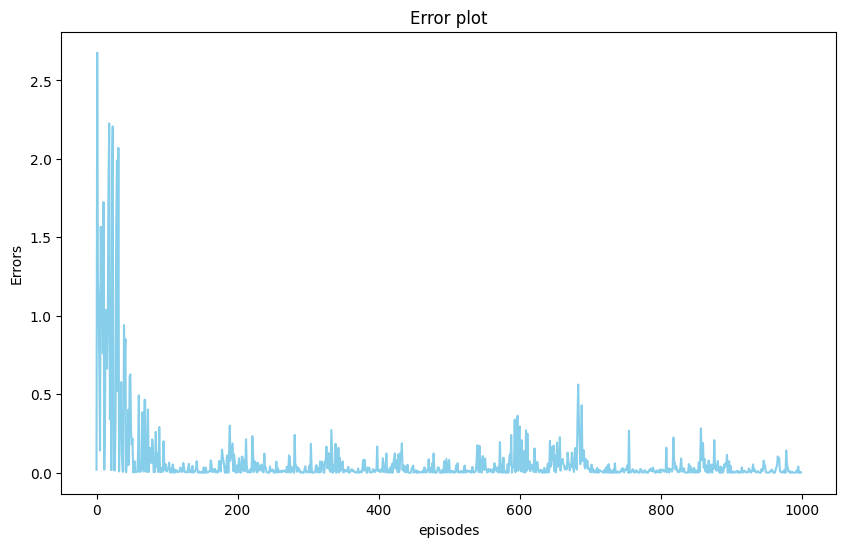

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(error,  color='skyblue')
plt.ylabel('Errors')
plt.xlabel('episodes')
plt.title('Error plot')
plt.show()